In [1]:
# Classification Dummy Data
from sklearn.datasets import make_classification 

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=2529)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
import matplotlib.pyplot as plt

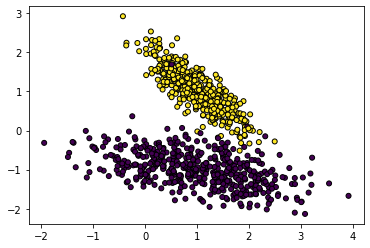

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k");